## QUESTION 1

In [2]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from math import sqrt

In [36]:
def show(img):
    fig, ax = plt.subplots(figsize = (6,6))
    plt.imshow(img)
    plt.show()

Function to stack all matrices from a list

In [37]:
def makeCube(matrix_list):
    depth = len(matrix_list)
    rows = matrix_list[0].shape[0]
    cube = np.zeros((depth, rows, rows))
    for d in range(depth):
        cube[d,:,:] = matrix_list[d]
    return cube

Function to visualise o/p of intermediate layers

In [38]:
def displayCube(cube, title):
    depth = cube.shape[0]
    rows = 2
    cols = depth // rows
    f, axarr = plt.subplots(rows, cols, figsize=(10,10))
    
    r, c = 0, 0
    f.suptitle(title)
    for d in cube:
#         print "d: ",d
        axarr[r,c].imshow(d)
        c += 1
        if c == cols:
            r += 1
            c = 0

Read input image

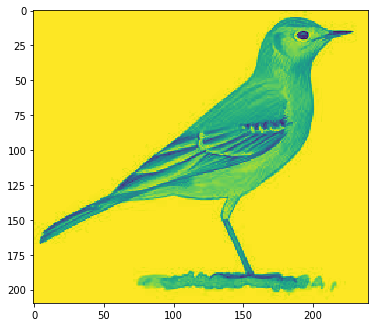

In [39]:
sample_img = cv2.imread('../input_data/bird.jpeg', 0)     
show(sample_img)

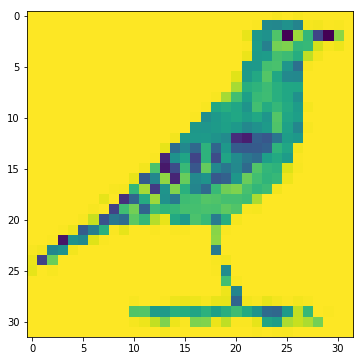

input_image: shape (1, 32, 32)  type  <type 'numpy.ndarray'>


In [40]:
sample_img = cv2.resize(sample_img, (32, 32)) 
show(sample_img) 
input_image = makeCube([sample_img])
print "input_image: shape",input_image.shape," type ",type(input_image)

KERNELS

In [41]:
kernel_size = 5

In [58]:
def getNdKernel(depth, num):
    kernel_list = []
    for i in range(num):
        temp_kernel_cube = np.random.randn(depth,kernel_size,kernel_size)
        
#         print temp_kernel_cube
#         print "--------------"
        kernel_list.append(temp_kernel_cube)
        
    return kernel_list
# getNdKernel(6,16)

In [42]:
def get6FiveXFive_d1():
    temp_cube = np.zeros((1, kernel_size, kernel_size))
    temp_cube[:,:,0] = np.array([-1,-1,-1,-1,-1])
    temp_cube[:,:,1] = np.array([-1,-1,-1,-1,-1])
    temp_cube[:,:,3] = np.array([1,1,1,1,1])
    temp_cube[:,:,4] = np.array([1,1,1,1,1])
    
    temp_cube1 = np.zeros((1, kernel_size, kernel_size))
    temp_cube1[:,:,0] = np.array([-1,-1,-1,-1,-1])
    temp_cube1[:,:,1] = np.array([1,1,1,1,1])
    temp_cube1[:,:,3] = np.array([-1,-1,-1,-1,-1])
    temp_cube1[:,:,4] = np.array([1,1,1,1,1])
    
    temp_cube2 = np.zeros((1, kernel_size, kernel_size))
    temp_cube2[:,:,0] = np.array([1,1,1,1,1])
    temp_cube2[:,:,1] = np.array([1,1,1,1,1])
    temp_cube2[:,:,3] = np.array([-1,-1,-1,-1,-1])
    temp_cube2[:,:,4] = np.array([-1,-1,-1,-1,-1])
    
    temp_cube3 = np.zeros((1, kernel_size, kernel_size))
    temp_cube3[:,:,0] = np.array([1,1,1,1,1])
    temp_cube3[:,:,1] = np.array([-1,-1,-1,-1,-1])
    temp_cube3[:,:,3] = np.array([1,1,1,1,1])
    temp_cube3[:,:,4] = np.array([-1,-1,-1,-1,-1])
    
    temp_cube4 = np.zeros((1, kernel_size, kernel_size))
    temp_cube4[:,:,0] = np.array([1,1,1,1,1])
    temp_cube4[:,:,4] = np.array([-1,-1,-1,-1,-1])
    
    temp_cube5 = np.zeros((1, kernel_size, kernel_size))
    temp_cube5[:,:,0] = np.array([-1,-1,-1,-1,-1])
    temp_cube5[:,:,4] = np.array([1,1,1,1,1])
    kernel_list = [temp_cube, temp_cube1, temp_cube2, temp_cube3, temp_cube4, temp_cube5]
    return kernel_list
# get6FiveXFive_d1()

In [64]:
def get16FiveXFive_d6():
    temp_cube = np.zeros((6, kernel_size, kernel_size))
    temp_cube[0,:,0] = np.array([-1,-1,-1,-1,-1])
    temp_cube[1,:,0] = np.array([-1,-1,-1,-1,-1])
    temp_cube[:,:,3] = np.array([1,1,1,1,1])
    temp_cube[:,:,4] = np.array([1,1,1,1,1])
    print temp_cube
    
#     return kernel_list
# get16FiveXFive_d6()

Function to find sub-matrices according to kernel size

In [43]:
def findSubCubes(cube):
    depth, row, col = cube.shape
    sub_cubes = []
    n = row - kernel_size + 1    
    for i in range(n): 
        for j in range(n): 
            temp_cube = cube[:, i: i + kernel_size, j : j + kernel_size] 
            sub_cubes.append(temp_cube)
    return sub_cubes

CONVOLUTION

In [44]:
def convolve(sub_cubes_list, kernel):
    total_sub_cubes = len(sub_cubes_list)
    n = int(sqrt(total_sub_cubes))
    
    convolution = np.zeros((n,n)) 
    bias = np.random.randn(n,n)
    r,c = 0,0
    for i in range(total_sub_cubes):
        convolution[r][c] = np.multiply(sub_cubes_list[i], kernel).sum()
        c += 1
        if c == n:
            r += 1
            c = 0
    convolution = bias + convolution
    return convolution

In [45]:
def convolveAll(sub_cubes_list, kernels_list):
    convolve_list = [] 
    for one_kernel in kernels_list:
    
        temp_matrix = convolve(sub_cubes_list, one_kernel)
        convolve_list.append(temp_matrix)
    
    return convolve_list

MAXPOOLING

In [46]:
def maxPooling(matrix):
    matrix_rows = matrix.shape[1]
    half = matrix_rows/2
    max_pool_matrix = np.zeros((half,half))
    cnt = 0
    r, c = 0,0
    for i in range(0,matrix_rows,2): #0,1,2
        for j in range(0,matrix_rows,2): #0,1,2
            temp = matrix[i: i + 2, j : j + 2] #0:2, 0:2
            
            maxi = temp.max()
            cnt+=1
#             print "(",r,c,")",
            max_pool_matrix[r][c] = maxi
        
            c += 1
            if c == half:
                c = 0
                r += 1
            
    return max_pool_matrix

In [47]:
def allMaxPool(convolution_list):
    
    max_pool_list = []
    for one_convolution in convolution_list:
        temp_matrix = maxPooling(one_convolution)
        max_pool_list.append(temp_matrix)
    return max_pool_list

In [48]:
def relu(x):
    return x * (x > 0)

In [49]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [50]:
def applyNonLinearity(convolution_list, func_name):
    new_conv_list = []
    for one_conv in convolution_list:
        if func_name == 'tanh':
            one_conv = np.tanh(one_conv)
        elif func_name == 'relu':
            one_conv = relu(one_conv)
        elif func_name == 'sigmoid':
            one_conv = sigmoid(one_conv)
        new_conv_list.append(one_conv)
    return new_conv_list

In [51]:
def getWeightsBias(h, w):
    wt = np.random.randn(h,w)
    bias = np.random.randn(w)
    return wt, bias

In [52]:
def computeFC(wts, inp, bias, activation_func):
    op = np.dot(wts.transpose(), inp) + bias
    op = applyNonLinearity(op, activation_func)
    return op

# print "output_fc2: shape: ",output_fc2.shape,output_fc2

In [53]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

In [54]:
def forwardPass(activation_func):

    # **CONV1 BEGIN** 
    # Make sub cubes of size 1x5x5 from input image of size 1x32x32

    sub_cubes_list1 = findSubCubes(input_image)

    # Get 6@5x5 kernels of depth 1 with randomly generated weights

#     kernels = getNdKernel(1,6)
    kernels = get6FiveXFive_d1()
    # Do convolutions with all sub_cubes and kernels

    conv1_list = convolveAll(sub_cubes_list1, kernels)

    conv1_list = applyNonLinearity(conv1_list, activation_func)

    first_cube_6x28x28 = makeCube(conv1_list)
    print "first_cube_6x28x28: shape", first_cube_6x28x28.shape, "type: ",type(first_cube_6x28x28)

    displayCube(first_cube_6x28x28, "After CONV1")

    # - OUTPUT AFTER CONV1 : 6x28x28 activation map
    # **POOL1 BEGIN**

    pool1_list = allMaxPool(conv1_list)

    second_cube_6x14x14 = makeCube(pool1_list)
    print "second_cube_6x14x14: type ",type(second_cube_6x14x14), "shape: ", second_cube_6x14x14.shape

    displayCube(second_cube_6x14x14, "After POOL1")

    # - OUTPUT AFTER POOL1: 6x14x14 feature map 
    # **CONV2 BEGIN**

    sub_cubes_list_2 = findSubCubes(second_cube_6x14x14)

    # 16 kernels of depth 6 shape 5x5 => 5x5x6 @ 16

    sixD_kernels_list = getNdKernel(6, 16)

    conv2_list = convolveAll(sub_cubes_list_2, sixD_kernels_list)

    conv2_list = applyNonLinearity(conv2_list, activation_func)

    third_cube_16x10x10 = makeCube(conv2_list)
    print "third_cube_16x10x10: type: ",type(third_cube_16x10x10), "shape: ",third_cube_16x10x10.shape

    displayCube(third_cube_16x10x10, "After CONV2")

    # - OUTPUT AFTER CONV2 : 16x14x14 activation map 
    # **POOL2 BEGIN**

    pool2_list = allMaxPool(conv2_list)

    fourth_cube_16x5x5 = makeCube(pool2_list)
    print "fourth_cube_16x5x5: type: ",type(fourth_cube_16x5x5), "shape: ",fourth_cube_16x5x5.shape
    displayCube(fourth_cube_16x5x5, "After POOL2")
    sub_cubes_list_3 = findSubCubes(fourth_cube_16x5x5)
    print "sub_cubes_list_3: type: ",type(sub_cubes_list_3), "len: ",len(sub_cubes_list_3), "shape[0]: ",sub_cubes_list_3[0].shape
    # - OUTPUT AFTER POOL2 : 16x5x5 feature map 
    sixD_kernels_list = getNdKernel(16, 120)
    
    conv3_list = convolveAll(sub_cubes_list_3, sixD_kernels_list)
    conv3_list = applyNonLinearity(conv3_list, activation_func)
    print "conv3_list: shape[0]",conv3_list[0].shape,"len:", len(conv3_list), "type: ",type(conv3_list)
    temp = np.array([])

    for i in range(len(conv3_list)):
        fl = np.ndarray.flatten(conv3_list[i][:,:])
        temp = np.hstack([temp, fl]) if temp.size else fl
    print "TEMP: ",len(temp)
    
    random_weights_fc2, bias_fc2 = getWeightsBias(120,84)
    print "random_weights_fc2: shape: ",random_weights_fc2.shape, random_weights_fc2.transpose().shape

    output_fc2 = computeFC(random_weights_fc2, temp, bias_fc2, activation_func)
    print "output_fc2: type: ",type(output_fc2), "len: ",len(output_fc2)

    random_weights_op, bias_op = getWeightsBias(84,10)
    print "random_weights_op: shape: ",random_weights_op.shape, random_weights_op.transpose().shape
    
    #gaussian
    tr = random_weights_op.transpose()

    yi = np.zeros((10,1))
    for i in range(10):
        s = 0
        for j in range(84):
            s += (output_fc2[j] - tr[i][j])**2
        yi[i][0] = s


    output = np.dot(random_weights_op.transpose(), output_fc2) + bias_op
    print "output: shape: ",output.shape

    to_sm = yi.reshape((-1,1))

    final_classes = softmax(to_sm)
    print
    print "FINAL CLASSES: "
    print final_classes
    
    return final_classes

### SIGMOID

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


first_cube_6x28x28: shape (6, 28, 28) type:  <type 'numpy.ndarray'>
second_cube_6x14x14: type  <type 'numpy.ndarray'> shape:  (6, 14, 14)
(6, 5, 5)
-----------
(6, 5, 5)
-----------
(6, 5, 5)
-----------
(6, 5, 5)
-----------
(6, 5, 5)
-----------
(6, 5, 5)
-----------
(6, 5, 5)
-----------
(6, 5, 5)
-----------
(6, 5, 5)
-----------
(6, 5, 5)
-----------
(6, 5, 5)
-----------
(6, 5, 5)
-----------
(6, 5, 5)
-----------
(6, 5, 5)
-----------
(6, 5, 5)
-----------
(6, 5, 5)
-----------
third_cube_16x10x10: type:  <type 'numpy.ndarray'> shape:  (16, 10, 10)
fourth_cube_16x5x5: type:  <type 'numpy.ndarray'> shape:  (16, 5, 5)
sub_cubes_list_3: type:  <type 'list'> len:  1 shape[0]:  (16, 5, 5)
(16, 5, 5)
-----------
(16, 5, 5)
-----------
(16, 5, 5)
-----------
(16, 5, 5)
-----------
(16, 5, 5)
-----------
(16, 5, 5)
-----------
(16, 5, 5)
-----------
(16, 5, 5)
-----------
(16, 5, 5)
-----------
(16, 5, 5)
-----------
(16, 5, 5)
-----------
(16, 5, 5)
-----------
(16, 5, 5)
-----------
(

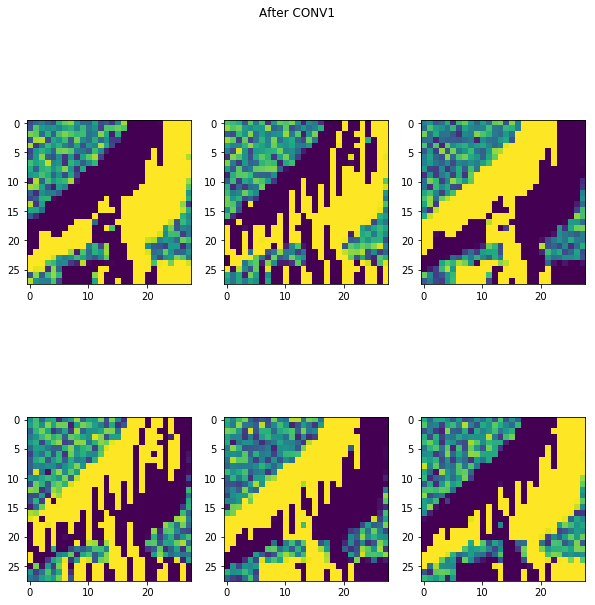

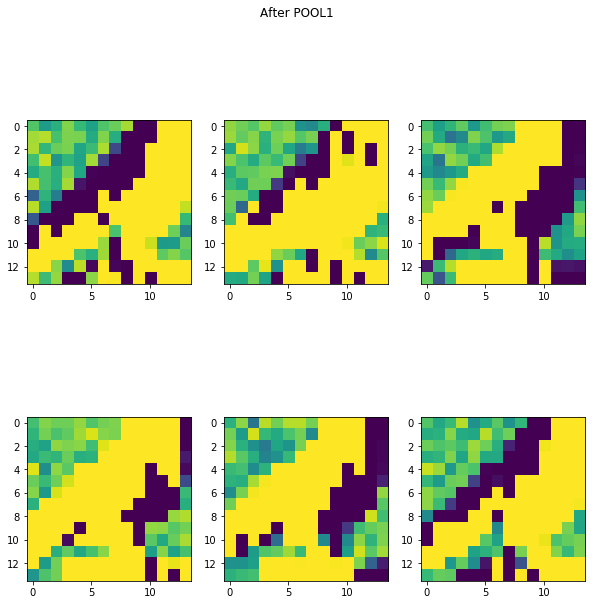

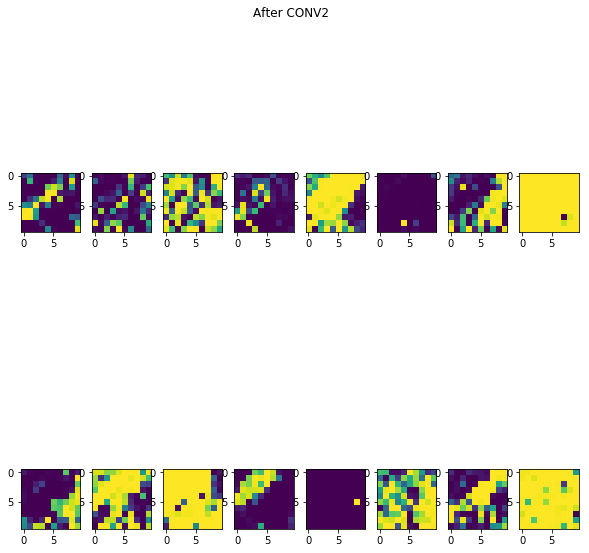

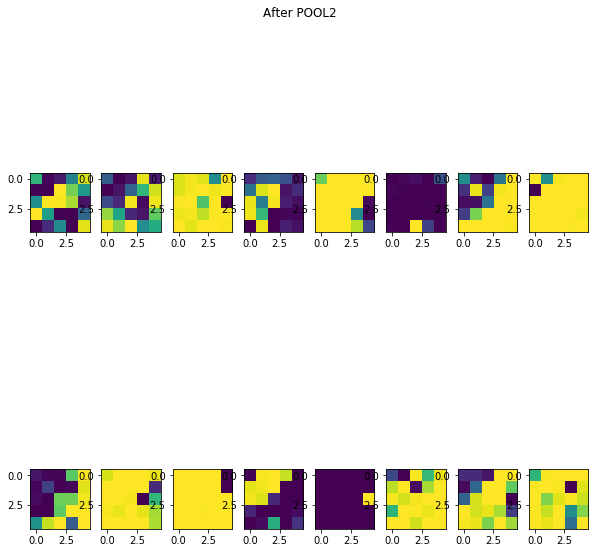

In [55]:
sigmoidClasses = forwardPass('sigmoid')

### TANH

first_cube_6x28x28: shape (6, 28, 28) type:  <type 'numpy.ndarray'>
second_cube_6x14x14: type  <type 'numpy.ndarray'> shape:  (6, 14, 14)
third_cube_16x10x10: type:  <type 'numpy.ndarray'> shape:  (16, 10, 10)
fourth_cube_16x5x5: type:  <type 'numpy.ndarray'> shape:  (16, 5, 5)
sub_cubes_list_3: type:  <type 'list'> len:  1 shape[0]:  (16, 5, 5)
conv3_list: shape[0] (1, 1) len: 120 type:  <type 'list'>
TEMP:  120
random_weights_fc2: shape:  (120, 84) (84, 120)
output_fc2: type:  <type 'list'> len:  84
random_weights_op: shape:  (84, 10) (10, 84)
output: shape:  (10,)

FINAL CLASSES: 
[[6.61024558e-29]
 [2.04471084e-16]
 [9.99999996e-01]
 [4.29975768e-12]
 [4.16313049e-09]
 [1.11478913e-11]
 [3.26385101e-25]
 [6.02009978e-21]
 [5.99895440e-12]
 [1.67698205e-15]]


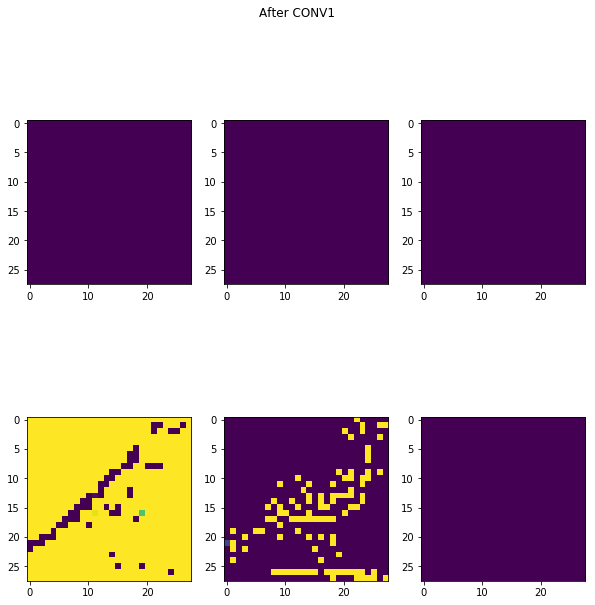

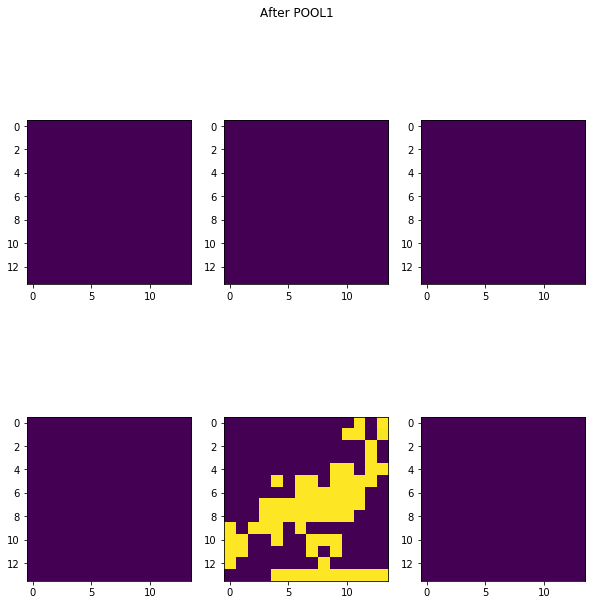

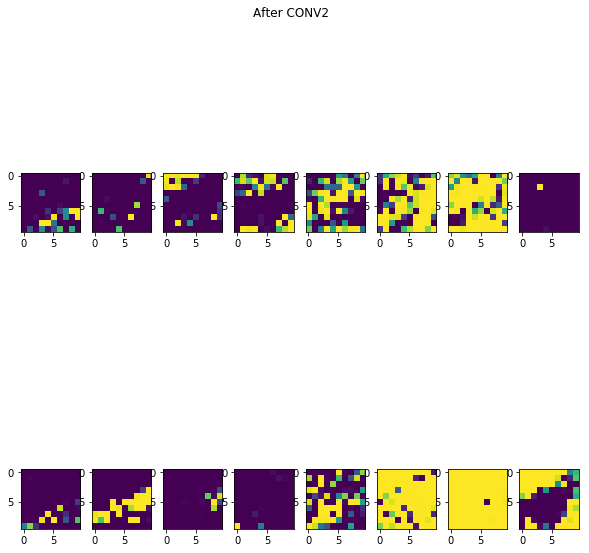

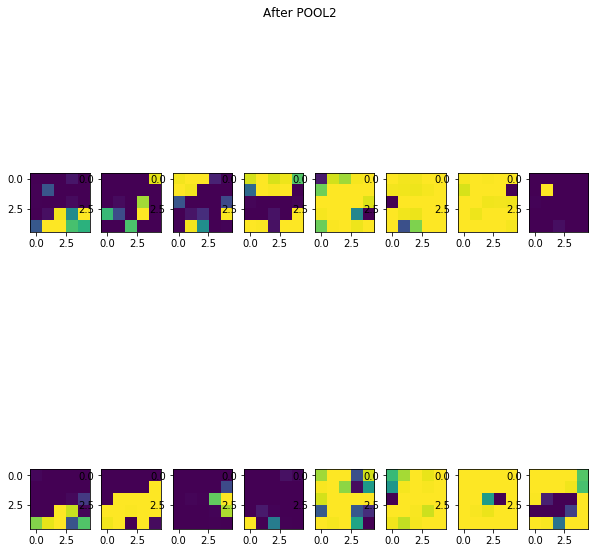

In [22]:
tanhClasses = forwardPass('tanh')

### RELU

first_cube_6x28x28: shape (6, 28, 28) type:  <type 'numpy.ndarray'>
second_cube_6x14x14: type  <type 'numpy.ndarray'> shape:  (6, 14, 14)
third_cube_16x10x10: type:  <type 'numpy.ndarray'> shape:  (16, 10, 10)
fourth_cube_16x5x5: type:  <type 'numpy.ndarray'> shape:  (16, 5, 5)
sub_cubes_list_3: type:  <type 'list'> len:  1 shape[0]:  (16, 5, 5)
conv3_list: shape[0] (1, 1) len: 120 type:  <type 'list'>
TEMP:  120
random_weights_fc2: shape:  (120, 84) (84, 120)
output_fc2: type:  <type 'list'> len:  84
random_weights_op: shape:  (84, 10) (10, 84)
output: shape:  (10,)

FINAL CLASSES: 
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]]


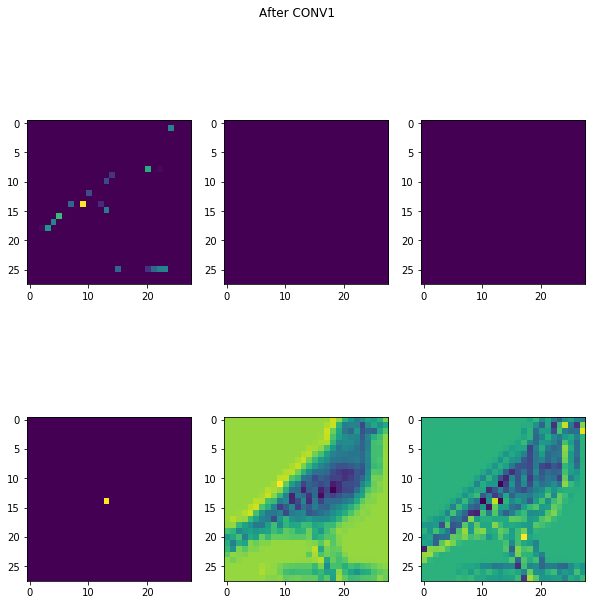

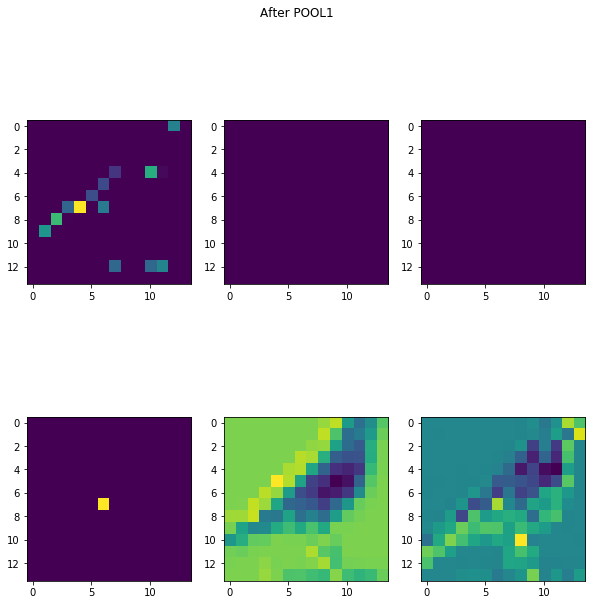

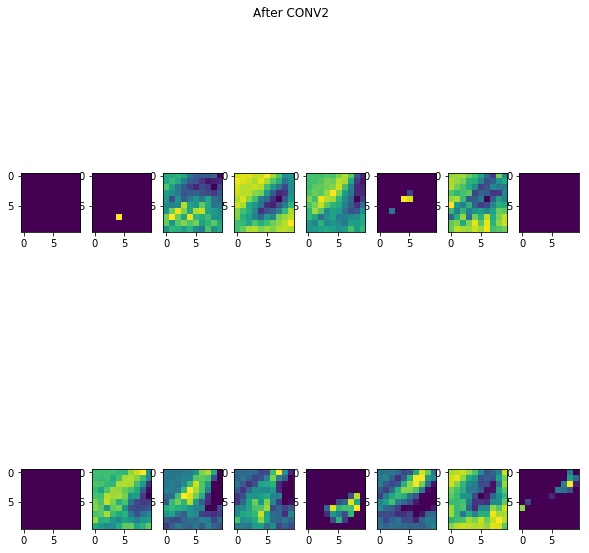

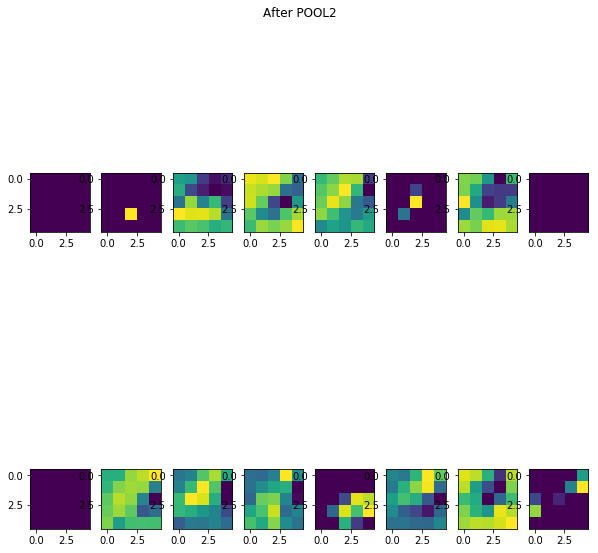

In [23]:
reluClasses = forwardPass('relu')

## QUESTION 2

### 1. Number of Parameters in 1st convolutional Layers: 
#### Ans: No. of filters = 5x5x6 = 150 
####  No. of biases = 6
#### Total params = 150 + 6 = 156

### 2. Number of Parameters in Pooling Operation: 
#### Ans: No parameters are there in pooling operation

### 3. Which of the following operations contain max number of parameters: 
#### (a) conv 
    CONV1: filters (5x5x6) + bias (6) = 156
    CONV2: filters (5x5x6x16) + bias (16) = 2416
    Total Parameters: 2572
#### (b)  pool
    Total Parameters: 0
#### (c)  Fully Connected Layer (FC)
    FC1: weights (400x120) + bias (120) = 48120
    FC2: weights (120x84) + bias (84) = 10164
    Total Parameters: 58284
#### (d)  Activation Functions
     Total Parameters: 0

### 4. Which operation consumes max memory?
#### (a) initial conv layers
    CONV1: input size = 32x32
           no. of filters = 6
           memory = 32x32x6 = 6144
    CONV2: input size = 14x14
           no. of filters = 16
           memory = 14x14x16 = 3136
           Total: 9280
#### (b) fully connected layers at the end
    FC1+FC2: 400 + 120 = 520
- Thus, initial conv layers consume most memory